In [1]:
pip install swifter

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import nltk
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

In [3]:
df = pd.read_csv("dataset.csv")
df

,Review,Rating
0,enak kuacinya,5
1,pengiriman cepat packing bagus sesuai pesanan ...,5
2,pengemasan luar biasa baik untuk rasa menurut ...,4
3,terimakasih min,5
4,udah order untuk kesekian kali jos,5
...,...,...
4055,seller sangat responsif rasa belum dicoba kare...,5
4056,imut2 banget packing aman,5
4057,good product trusted seller,5
4058,sudah beli yg ke 3,5


In [4]:
pd.value_counts(df['Rating'])

5    3581
4     248
3     117
1      64
2      50
Name: Rating, dtype: int64

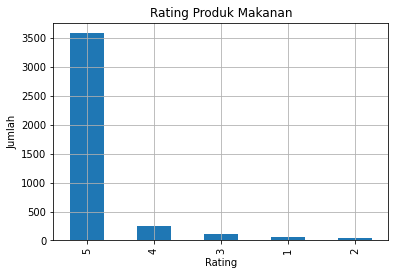

In [5]:
import matplotlib
import matplotlib.pyplot as plt

pd.value_counts(df['Rating']).plot.bar()
plt.xlabel('Rating')
plt.ylabel('Jumlah')
plt.title('Rating Produk Makanan')
plt.grid()
plt.show()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


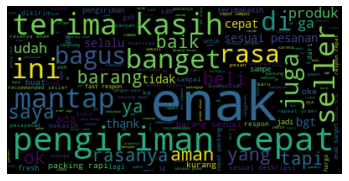

In [6]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')
stopwords = set(STOPWORDS)
stopwords.update(["br", "href", "tp", "dan", "nya", "yg"])
textt = " ".join(str(review) for review in df.Review)
wordcloud = WordCloud(stopwords=stopwords).generate(textt)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('wordcloud11.png')
plt.show() 

In [7]:
# assign reviews with score > 3 as positive sentiment
# score < 3 negative sentiment remove
df['sentiment'] = df['Rating'].apply(lambda rating : +1 if rating > 3 else (0 if rating == 3 else -1))
df

,Review,Rating,sentiment
0,enak kuacinya,5,1
1,pengiriman cepat packing bagus sesuai pesanan ...,5,1
2,pengemasan luar biasa baik untuk rasa menurut ...,4,1
3,terimakasih min,5,1
4,udah order untuk kesekian kali jos,5,1
...,...,...,...
4055,seller sangat responsif rasa belum dicoba kare...,5,1
4056,imut2 banget packing aman,5,1
4057,good product trusted seller,5,1
4058,sudah beli yg ke 3,5,1


In [8]:
# split df - positive and negative sentiment
positive = df[df['sentiment'] == 1]
negative = df[df['sentiment'] == -1]
netral = df[df['sentiment'] == 0]

Text(0.5, 1.0, 'Total sentimen produk')

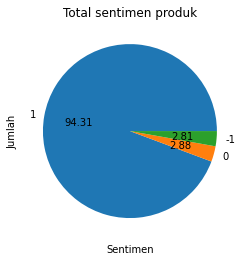

In [9]:
pd.value_counts(df['sentiment']).plot.pie(autopct='%.2f')
plt.xlabel('Sentimen')
plt.ylabel('Jumlah')
plt.title('Total sentimen produk')

In [10]:
df_samples = df[['Review', 'sentiment']]
df_samples

,Review,sentiment
0,enak kuacinya,1
1,pengiriman cepat packing bagus sesuai pesanan ...,1
2,pengemasan luar biasa baik untuk rasa menurut ...,1
3,terimakasih min,1
4,udah order untuk kesekian kali jos,1
...,...,...
4055,seller sangat responsif rasa belum dicoba kare...,1
4056,imut2 banget packing aman,1
4057,good product trusted seller,1
4058,sudah beli yg ke 3,1


In [11]:
samp1 = df[df['sentiment']==1].sample(1000,replace=True)
samp2 = df[df['sentiment']==0].sample(1000,replace=True)
samp3 = df[df['sentiment']==-1].sample(1000,replace=True)
df = pd.concat([samp1, samp2, samp3])

print(df.shape)
print(df['sentiment'].value_counts(normalize=True))

(3000, 3)
 1    0.333333
 0    0.333333
-1    0.333333
Name: sentiment, dtype: float64


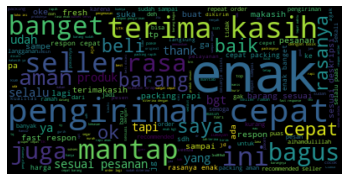

In [12]:
stopwords = set(STOPWORDS)
stopwords.update(["br", "href", "dan", "yg", "nya", "di"])
pos = " ".join(str(review) for review in positive.Review)
wordcloud2 = WordCloud(stopwords=stopwords).generate(pos)
plt.imshow(wordcloud2, interpolation='bilinear')
plt.axis("off")
plt.show()

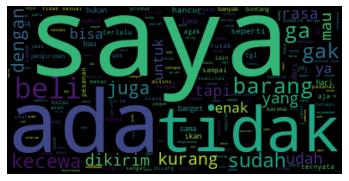

In [13]:
stopwords = set(STOPWORDS)
stopwords.update(["br", "href", "dan", "tp", "yg", "di", "nya", "ini"])
pos = " ".join([str(review) for review in negative.Review])
wordcloud2 = WordCloud(stopwords=stopwords).generate(pos)
plt.imshow(wordcloud2, interpolation='bilinear')
plt.axis("off")
plt.show()

In [14]:
def remove_punctuation(text):
  final = "".join(u for u in text if u not in ("?", ".", ";", ":", "!",'"', "[", "^", "\\", "#", "@", "/", "%", "-", "_"))
  return final
  
df['Review'] = df['Review'].astype(str).apply(remove_punctuation)

In [15]:
import re

def tokenize(text):
  token = re.split('\W+', text)
  return token

df['Review_clean'] = df['Review'].apply(lambda x: tokenize(x))
df

,Review,Rating,sentiment,Review_clean
991,moachi nya enaaak sampai langsung abisss,5,1,"[moachi, nya, enaaak, sampai, langsung, abisss]"
3931,produk sesuai pesanan respond dan pengiriman m...,5,1,"[produk, sesuai, pesanan, respond, dan, pengir..."
192,sayang kemasan kimchinya meletus karena tekana...,4,1,"[sayang, kemasan, kimchinya, meletus, karena, ..."
3049,di terima dgn selamat gak ada yg hancur ato pa...,5,1,"[di, terima, dgn, selamat, gak, ada, yg, hancu..."
654,soal rasa egk di ragukan lagi,5,1,"[soal, rasa, egk, di, ragukan, lagi]"
...,...,...,...,...
386,bandengnya udah adem pantesan berlendir pas di...,2,-1,"[bandengnya, udah, adem, pantesan, berlendir, ..."
2403,terlalu basah bawangnta,2,-1,"[terlalu, basah, bawangnta]"
1246,udah agak remuk2,2,-1,"[udah, agak, remuk2]"
1189,kurang maknyuss,2,-1,"[kurang, maknyuss]"


In [16]:
vec = TfidfVectorizer(use_idf=True, lowercase=True, strip_accents='ascii')
vec

TfidfVectorizer(strip_accents='ascii')

In [17]:
x = vec.fit_transform(df['Review'])
y = df['sentiment']
print(x)

  (0, 50)	0.5130067734697538
  (0, 1289)	0.375155820138937
  (0, 1995)	0.24262333674175648
  (0, 740)	0.466344013501455
  (0, 1631)	0.1905720910951841
  (0, 1544)	0.5323735686764456
  (1, 1561)	0.5931759316406332
  (1, 1773)	0.2366225050815383
  (1, 535)	0.199790218999335
  (1, 1939)	0.5642458070579479
  (1, 1800)	0.2937036149939608
  (1, 2118)	0.2416140830090941
  (1, 1854)	0.29870296826794457
  (2, 532)	0.1912041550497326
  (2, 176)	0.2013075613633815
  (2, 1684)	0.16638109802861842
  (2, 2091)	0.14040742287802715
  (2, 229)	0.15483819147320046
  (2, 990)	0.13402474287880387
  (2, 712)	0.24963489240620484
  (2, 1090)	0.24963489240620484
  (2, 2465)	0.17379367891495476
  (2, 2134)	0.24963489240620484
  (2, 2020)	0.14330888123183458
  (2, 1322)	0.14287682400690926
  :	:
  (2994, 562)	0.2883347964425523
  (2994, 805)	0.28042932838836615
  (2994, 211)	0.29350660649828564
  (2994, 1894)	0.2654871954155895
  (2994, 2177)	0.47269419395448264
  (2994, 2192)	0.4775877511483941
  (2994, 2118)	

In [18]:
sentimen = df[['Review_clean','sentiment']]
sentimen

,Review_clean,sentiment
991,"[moachi, nya, enaaak, sampai, langsung, abisss]",1
3931,"[produk, sesuai, pesanan, respond, dan, pengir...",1
192,"[sayang, kemasan, kimchinya, meletus, karena, ...",1
3049,"[di, terima, dgn, selamat, gak, ada, yg, hancu...",1
654,"[soal, rasa, egk, di, ragukan, lagi]",1
...,...,...
386,"[bandengnya, udah, adem, pantesan, berlendir, ...",-1
2403,"[terlalu, basah, bawangnta]",-1
1246,"[udah, agak, remuk2]",-1
1189,"[kurang, maknyuss]",-1


In [19]:
#Split into training and testing data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [20]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
model = MultinomialNB()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
accuracy_score(y_test, y_pred)

0.9333333333333333

In [21]:
model.score(x_test, y_test)

0.9333333333333333

In [22]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

          -1       1.00      0.95      0.97       252
           0       0.96      0.89      0.93       269
           1       0.84      0.97      0.90       229

    accuracy                           0.93       750
   macro avg       0.94      0.94      0.93       750
weighted avg       0.94      0.93      0.93       750



In [23]:
print(model.predict(vec.transform(['rasa enak'])))

[0]


In [24]:
print(model.predict(vec.transform(['lama'])))

[-1]


In [25]:
print(model.predict(vec.transform(['jelek banget'])))

[-1]
